# COVID-19 Data Analysis Tool

Brett Deaton - Fall 2020

This notebook gathers up-to-date data on COVID-19 infections from the Centers For Disease Control and Prevention, for further analysis.

Data from https://github.com/datasets/covid-19 dataset, a sanitized version of the the COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University (JHU) https://github.com/CSSEGISandData/COVID-19 dataset. The data is compiled from state health departments and used widely, notably for the [JHU COVID-19 Dashboard](https://coronavirus.jhu.edu/map.html).

## Setup

We want to read in and organize the data from its source. We use the pandas
package to fetch and interpret a comma-separated-values file (csv) at the
listed url. Think of pandas as Excel for python.

The pandas function `read_csv()` returns a `DataFrame` object, with many
useful methods you can read about in the official
[documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

In [1]:
import pandas
url = 'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'
df = pandas.read_csv(url, parse_dates=['Date']) # convert date string to a timestamp object

We also want to plot the data. We use the matplotlib.pyplot package with loads
of plotting functionality you can read about in the official
[documentation](https://matplotlib.org/api/pyplot_api.html) or explore in a
[tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html).

Below we will use pyplot indirectly through the `plot()` method of the
pandas DataFrame object.

In [2]:
import matplotlib.pyplot as plt

## Inspect Data

This is a really large dataset!

In [3]:
# output the first few rows
df.head(3)

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0


In [4]:
# output the last few rows
df.tail(3)

,Date,Country,Confirmed,Recovered,Deaths
50082,2020-10-10,Zimbabwe,8010,6492,230
50083,2020-10-11,Zimbabwe,8011,6504,230
50084,2020-10-12,Zimbabwe,8021,7627,230


Let's look at specific ranges of cells, and a description of the size of the DataFrame.

In [5]:
# interact with specific table elements in the DataFrame
print('## First Row', df.loc[0], sep='\n')
print()

print('## First Cell', df.at[0, 'Date'], sep='\n')
print()

print('## Shape of the Table', df.shape, sep='\n')

## First Row
Date         2020-01-22 00:00:00
Country              Afghanistan
Confirmed                      0
Recovered                      0
Deaths                         0
Name: 0, dtype: object

## First Cell
2020-01-22 00:00:00

## Shape of the Table
(50085, 5)


Let's make some lists out of the DataFrame.

In [6]:
# create a list of the headers
headers = list( df.columns.values )
print(headers)

['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths']


In [7]:
# create a list of the countries
countries = list( df['Country'].drop_duplicates() )
print(len(countries), 'countries:')
print(countries)

189 countries:
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'I

In [8]:
# create a list of the dates
days = list( df['Date'].drop_duplicates() )
print('## Last Three of', len(days), 'Days')
for day in days[-3:]:
    print (day.date(), sep='\n')

## Last Three of 265 Days
2020-10-10
2020-10-11
2020-10-12


## Analyze Data

We want to examine specific subsets of the data to answer various questions:

* What are the cumulative effects?
* How are new case counts changing?
* Are there any underlying patterns in new case counts?

Let's make some visualizations to answer these questions! We'll use the `plot()` method of the DataFrame
object. Fore more information on this method see the
[documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).

In [9]:
# select a country to analyze
country = 'US'

#### What are the cumulative effects?

In [10]:
# select subset of data from one country
stencil = ( df['Country'] == country )
df_country = df[stencil].copy()

<AxesSubplot:title={'center':'Cumulative Cases (US)'}, xlabel='Date'>

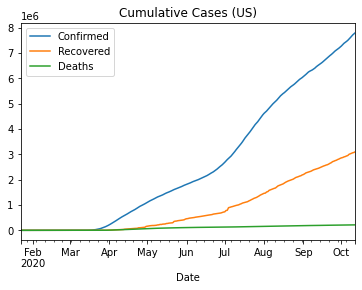

In [11]:
# make a time series plot of the case counts
df_country.plot(title='Cumulative Cases ('+country+')', x='Date')

#### How are new case counts changing?

In [12]:
# create new column for new cases, by taking daily difference of confirmed cases
daily_diff = df_country['Confirmed'].diff()
df_country['Confirmed New'] = daily_diff
df_country.head()

,Date,Country,Confirmed,Recovered,Deaths,Confirmed New
46375,2020-01-22,US,1,0,0,NaN
46376,2020-01-23,US,1,0,0,0.0
46377,2020-01-24,US,2,0,0,1.0
46378,2020-01-25,US,2,0,0,0.0
46379,2020-01-26,US,5,0,0,3.0


<AxesSubplot:title={'center':'New Cases (US)'}, xlabel='Date'>

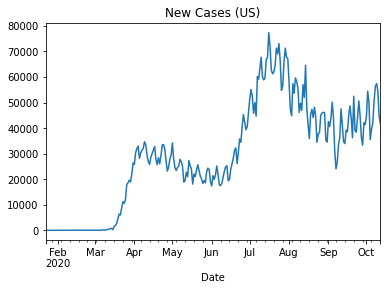

In [13]:
# make a time series plot of the new case counts
df_country.plot(title='New Cases ('+country+')', x='Date', y='Confirmed New', legend=None)

#### Are there any underlying patterns in new case counts?

From the previous plot, there appears to be a regular wiggle in the data.
New case counts rise and then fall roughly once weekly. Let's combine the
data by day of the week, to search for weekly patterns.

In [14]:
# first create new column for day of the week
day_of_wk = df_country['Date'].dt.dayofweek # order is Mon, Tue, ...
df_country['Day of Week'] = day_of_wk

# then sum up new cases for each day
sum_by_day = df_country.groupby(['Day of Week']).sum()
sum_by_day

,Confirmed,Recovered,Deaths,Confirmed New
Day of Week,,,,
0,103019795,34191322,3715915,1002058.0
1,96275375,31491166,3537473,1059779.0
2,97391511,32019367,3576153,1116135.0
3,98595508,32465597,3611701,1203997.0
4,99872691,32865909,3646347,1277183.0
5,101030279,33367349,3675526,1157588.0
6,102017737,33649722,3694099,987458.0


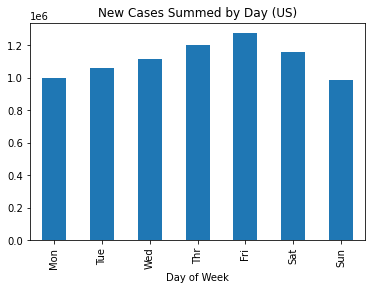

In [15]:
# make a bar chart plot of the new cases grouped by day of the week

# fist generate the plot object
plot_day_sum = sum_by_day.plot.bar(title='New Cases Summed by Day ('+country+')', y='Confirmed New', legend=None)

# reset the bar labels
daynames = [ 'Mon', 'Tue', 'Wed', 'Thr', 'Fri', 'Sat', 'Sun' ]
plot_day_sum.set_xticklabels(daynames)

# then display the plot
plt.show()

### Todo

Modifications or repairs to make:

* explore differences between different countries